# Impactful Events on the Euro Exchange Rate

In this project, our objective is to identify factors that may have influenced the variation of the Euro exchange rate over the years. To accomplish this, we begin by examining and analyzing the fluctuations in the exchange rate between the Euro and the US Dollar. Through this analysis, we identify three significant events that have the potential to impact the exchange rate. Subsequently, we proceed to compare the exchange rate between the Euro and various other countries. This comparative analysis allows us to determine whether these three events have had a significant influence on the Euro exchange rate with different nations.

## Data
We used the daily exchange rates per Euro between the year of 1999 to 2023. 
The data can be found on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020?resource=download). 

In [1]:
# Read in the dataset from the csv file
import pandas as pd

exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6311 non-null   object 
 1   [Australian dollar ]      6311 non-null   object 
 2   [Bulgarian lev ]          5909 non-null   object 
 3   [Brazilian real ]         6043 non-null   object 
 4   [Canadian dollar ]        6311 non-null   object 
 5   [Swiss franc ]            6311 non-null   object 
 6   [Chinese yuan renminbi ]  6043 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6311 non-null   object 
 9   [Danish krone ]           6311 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6311 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6311 non-null   object 
 14  [Croatia

In [2]:
exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-05-26,1.6439,1.9558,5.3878,1.4630,0.9707,7.5874,NaN,23.648,7.4489,...,4.9572,NaN,11.5280,1.4520,NaN,NaN,37.2630,21.5340,1.0751,21.0148
1,2023-05-25,1.6443,1.9558,5.3320,1.4599,0.9708,7.5891,NaN,23.645,7.4502,...,4.9495,NaN,11.5490,1.4515,NaN,NaN,37.1540,21.3944,1.0735,20.7466
2,2023-05-24,1.6402,1.9558,5.3397,1.4600,0.9732,7.6005,NaN,23.671,7.4477,...,4.9614,NaN,11.5103,1.4526,NaN,NaN,37.1710,21.4487,1.0785,20.7479
3,2023-05-23,1.6282,1.9558,5.3649,1.4571,0.9718,7.6039,NaN,23.681,7.4475,...,4.9720,NaN,11.4494,1.4527,NaN,NaN,37.4350,21.3993,1.0779,20.7920
4,2023-05-22,1.6294,1.9558,5.4056,1.4618,0.9700,7.6067,NaN,23.676,7.4478,...,4.9737,NaN,11.3765,1.4554,NaN,NaN,37.2820,21.4629,1.0822,20.9137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6306,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6307,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6308,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6309,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


Observations based on the provided data:

- Except for the first column representing time, the dataset comprises 40 columns representing the exchange rate of the euro with different countries.
- Data cleaning:
    - Some values are missing.
    - Most of the data is in the form of strings (object format), but there are a few columns with numeric values in float format.
    - All the column names are enclosed in brackets.
   

## Euro vs. US Dollar
Let's go ahead and start with examining the exchange rate between Euro and US dollar.
### [1] Data Cleaning
We will perform the following cleaning procedures:
1. Format the column names by removing the brackets and replacing spaces and special characters with underscores, for example, [US dollar] will be changed to US_dollar.
2. Convert the `Time` column to the `datetime` data type.
3. Sort the rows in ascending order based on the `Time` column.
4. Reset the index and remove the original index column.

In [3]:
# Perform data cleaning
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [4]:
# Examine time versus value counts
euro_to_dollar = exchange_rates[['Time','US_dollar']]
print(euro_to_dollar['US_dollar'].value_counts().head(10))
print(euro_to_dollar['US_dollar'].value_counts().tail(10))

-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
1.3373     6
1.0867     6
1.1346     6
1.1765     6
1.1345     6
Name: US_dollar, dtype: int64
0.8935    1
0.9018    1
0.9774    1
1.5336    1
1.2381    1
0.8983    1
0.8733    1
0.9555    1
1.3692    1
0.9875    1
Name: US_dollar, dtype: int64


Obviously, there are 62 rows that have missing values represented as "-". We will remove these rows.

In [5]:
# Drop rows with missing data
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar']!='-']

# Convert the 'US_dollar' column to float type
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

In [6]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6310
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6249 non-null   datetime64[ns]
 1   US_dollar  6249 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.5 KB


### [2] Data Analysis

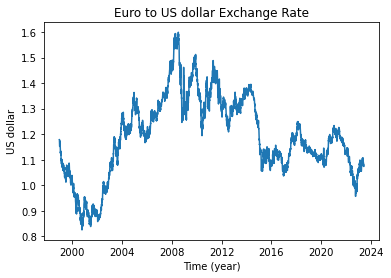

In [7]:
# Plot the evolution of the euro-dollar exchange rate
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.xlabel('Time (year)')
plt.ylabel('US dollar')
plt.title('Euro to US dollar Exchange Rate')
plt.show()

Small fluctuations can be observed in the exchange rate due to daily variations. Since our goal is to analyze the exchange rate in the long term, we will apply a smoothing technique to the trend.

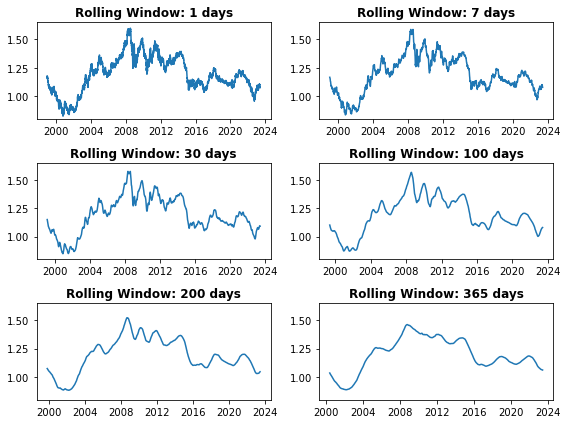

In [8]:
# Examine the effect of different rolling/moving window lengths 
time = euro_to_dollar['Time']
rate = euro_to_dollar['US_dollar']

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(8,6))

location = [ax1, ax2, ax3, ax4, ax5, ax6]
days = [1, 7, 30, 100, 200, 365]
for ax, day in zip(location, days):
    ax.plot(time, rate.rolling(day).mean())
    ax.set_title("Rolling Window: {} days".format(day), weight='bold')
    ax.set_ylim([0.8,1.65])


fig.tight_layout()
plt.show()

It appears that a rolling window of 30 days (equivalent to one month) is sufficient for our analysis. Therefore, we will proceed to smooth the curve using a 30-day moving window.

In [9]:
# Add a column of rolling_mean representing the rolling mean of the US_dollar
# with a rolling window of 30 days
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

Here are some major events that strongly affected the exchange rate between the US dollar and the Euro:

1. Formation of the Euro: The Euro was introduced as a currency in 1999, initially in electronic form, and then fully rolled out in 2002.

2. Financial Crises: 
    1. Starting in 2008, the global financial crisis had a significant impact on the global economy. Its most severe effects were felt in 2008 and 2009, but its repercussions lasted for several years as economies worked towards recovery.
    2. Eurozone Debt Crisis: The Eurozone debt crisis emerged in 2010 and unfolded over an extended period. It primarily affected certain countries within the Eurozone, and efforts to address the crisis took place over several years.

3. Brexit Referendum: The referendum on the United Kingdom's membership in the European Union occurred in 2016. The formal process of the UK leaving the EU, known as Brexit, started in 2017 and concluded on January 31, 2020, when the UK officially withdrew from the EU.



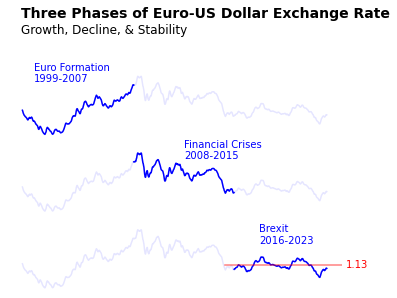

In [10]:
# Set x and y axis data with different year range
rate_m = euro_to_dollar['rolling_mean'] 
year_int = time.dt.strftime('%Y').astype(int)
time1 = time[year_int.between(1999,2007)]
rate1 = rate_m[year_int.between(1999,2007)]
time2 = time[year_int.between(2008,2015)]
rate2 = rate_m[year_int.between(2008,2015)]
time3 = time[year_int.between(2016,2023)]
rate3 = rate_m[year_int.between(2016,2023)]

import datetime as dt
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)

axes = [ax1,ax2,ax3]
for ax in axes:
    
    # Plot the line
    ax.plot(time, rate_m, color='b', alpha=0.1)
    
    # To improve data-ink ratio, we hide some redundant features
    # Hide tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    # Hide ticks
    ax.tick_params(bottom=0, left=0) 
    # Hide frames
    for loc in ['top','bottom','left','right']:
        ax.spines[loc].set_visible(False)
                
# Title 
ax1.text(dt.datetime(1999,1,1),2.3,'Three Phases of Euro-US Dollar Exchange Rate', size=14, weight='bold')
ax1.text(dt.datetime(1999,1,1),2.1,'Growth, Decline, & Stability', size=12)

# Axe 1: 1999-2007
ax1.plot(time1, rate1, color='b')
ax1.text(dt.datetime(2000,1,1),1.5,'Euro Formation\n1999-2007',color='b')


# Axe 2: 2008-2015
ax2.plot(time2, rate2, color='b')
ax2.text(dt.datetime(2012,1,1),1.5,'Financial Crises\n2008-2015',color='b')


# Axe 3: 2016-2023
ax3.plot(time3, rate3, color='b')
ax3.text(dt.datetime(2018,1,1),1.4,'Brexit\n2016-2023',color='b')
ax3.axhline(y=1.13,alpha=0.5,xmin=0.65,color='r')
ax.text(dt.datetime(2024,12,1),1.1,'1.13',color='r')

plt.show()

1. __Phase 1__: Despite initially starting with a decreasing trend, the exchange rate gradually stabilized after the Euro's rollout in 2002.
2. __Phase 2__: Throughout the financial crisis, the exchange rate experienced an overall decline. Although there were minor increases following each downturn, the overall trend was a decrease in the exchange rate.
3. __Phase 3__: After the UK's decision to leave the EU, the exchange rate stabilized, maintaining an average rate of 1.13. However, by the end of 2021, the exchange rate decreased, potentially influenced by the COVID-19 pandemic.

In [11]:
print("Average exchange rate in phase 3: {:.2f}".format(rate3.mean()))

Average exchange rate in phase 3: 1.13


## Euro vs. Different Countries
Let's now compare the Euro exchange rate with different countries.

### [1] Data Cleaning

In [12]:
# Replace special characters
exchange_rates.columns = exchange_rates.columns.str.replace('[\[,\]]','', regex=True)

# Replace leading and trailing spaces
exchange_rates.columns = exchange_rates.columns.str.strip()

# Replace spaces in between with underline
exchange_rates.columns = exchange_rates.columns.str.replace(' ','_')

Since the exchange rates vary across different countries and have a wide range of values, we will restrict our analysis to countries with exchange rates between 0 and 7.

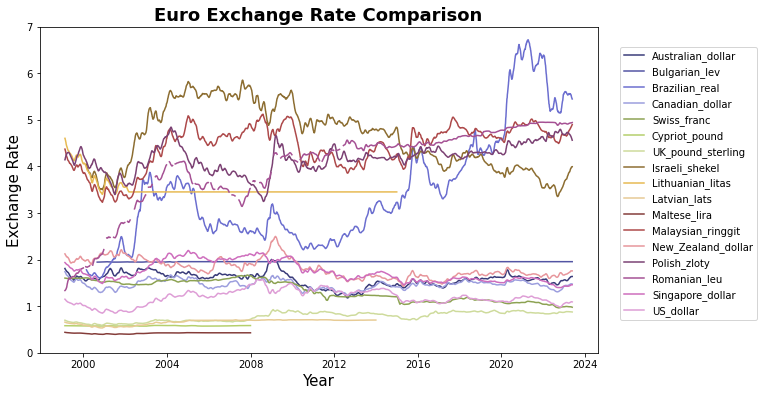

In [13]:
# Countries information
countries = exchange_rates.iloc[:,1:]
time_all = exchange_rates['Time']

# Plot 
from matplotlib.pyplot import cm
import numpy as np

# label color definition
color = iter(cm.tab20b(np.linspace(0, 1, 17)))

plt.figure(figsize=(10,6))

for country in countries:
    
    rate_t = countries[country]
    num_col = rate_t != '-'
    time_t = time_all[num_col]
    rate_t = rate_t[num_col].astype(float)
    rate_t = rate_t.rolling(30).mean()
    
    if (rate_t.max()) <=7:
        c = next(color)
        plt.plot(time_t, rate_t, label=country, color=c)

plt.title('Euro Exchange Rate Comparison',weight='bold',size=18)
plt.xlabel('Year',size=15)
plt.ylabel('Exchange Rate',size=15)
plt.legend(loc=(1.04, 0.1))
plt.ylim([0,7])
plt.show()

We have observed two distinct patterns in the exchange rate data:

1. Currencies including UK, Swiss, US, Canadian, Australian, New Zealand, and Singapore display a narrower range of variation.
2. Currencies such as Brazilian, Romanian, Malaysian, Polish, and Israeli exhibit high variation in their exchange rates.

Since the remaining data either lack sufficient variation or have limited data, we will exclude them from our analysis. 

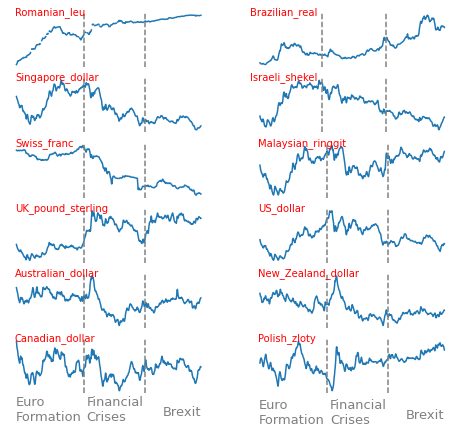

In [14]:
group = ['Romanian_leu','Brazilian_real','Singapore_dollar',
         'Israeli_shekel','Swiss_franc','Malaysian_ringgit',
         'UK_pound_sterling','US_dollar','Australian_dollar',
         'New_Zealand_dollar','Canadian_dollar', 'Polish_zloty']

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12)) = plt.subplots(nrows=6,ncols=2,figsize=(8,7))
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]

for country, ax in zip(group,axes):
    
    rate_t = countries[country]
    num_col = rate_t != '-'
    rate_t = rate_t[num_col].astype(float)
    rate_t = rate_t.rolling(30).mean()
    # normalize
    rate_t = rate_t/np.abs(rate_t.max())
    time_t = time_all[num_col]
    
    ax.plot(time_t, rate_t, label=country)
    
    # To improve data-ink ratio, we hide some redundant features
    # Hide tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    # Hide ticks
    ax.tick_params(bottom=0, left=0) 
    # Hide frames
    for loc in ['top','bottom','left','right']:
        ax.spines[loc].set_visible(False)
        
    ax.axvline(dt.datetime(2008,1,1), ls='--', color='grey')
    ax.axvline(dt.datetime(2016,1,1), ls='--', color='grey')
    ax.text(dt.datetime(1998,12,1),1,country,color='r')
    
ax11.text(dt.datetime(1999,1,1),0.53,'Euro\nFormation',color='grey',size=13)
ax11.text(dt.datetime(2008,5,1),0.53,'Financial\nCrises',color='grey',size=13)
ax11.text(dt.datetime(2018,5,1),0.56,'Brexit',color='grey',size=13)
ax12.text(dt.datetime(1999,1,1),0.45,'Euro\nFormation',color='grey',size=13)
ax12.text(dt.datetime(2008,5,1),0.45,'Financial\nCrises',color='grey',size=13)
ax12.text(dt.datetime(2018,5,1),0.48,'Brexit',color='grey',size=13)
plt.show()


Based on the analysis above, we observed the following trends in the Euro exchange rate with different countries:

1. Initial Establishment of Euro: When the Euro was first introduced, its exchange rate to different countries showed varying patterns of increase, ranging from slow (e.g., UK) to steep (e.g., Israel).

2. Financial Crises (Phase 2): Except for Romanian and Brazilian exchange rates, the Euro exchange rate generally decreased during financial crises. However, Romania and Brazil managed to maintain a stable increase in their exchange rates over the years.

3. Continuing Decrease: The exchange rates with Singapore, Israel, and Switzerland have continued to decrease over the years.

4. Stable Exchange Rate After Brexit (Phase 3): Following the Brexit event, the exchange rates with other countries showed stability, and in some cases, even increased.

Please note that these observations provide a general overview, and individual country dynamics may have additional factors influencing their exchange rates.

## Conclusions

In this project, we have explored the exchange rate between the Euro and the US dollar. We have identified three distinct phases that may have influenced the exchange rate: the introduction of the Euro (1999), the global financial crisis (2008), and the Brexit event (2016). We observed an increase in the exchange rate during the Euro introduction, a decline during the financial crisis, and subsequent stabilization after Brexit. To validate the robustness of these phases, we also compared the Euro exchange rate with different countries. We found that, for most countries, the exchange rate followed the patterns observed in the three phases. However, it should be noted that the trend of the third phase cannot be generalized to all countries.